In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import pickle
import xgboost as xgb

whole = pd.read_csv('../input/whole.csv')

load = pd.read_csv('../input/Load_history.csv')
temp = pd.read_csv('../input/temperature_history.csv')
weights = pd.read_csv('../input/weights.csv')
benchmark = pd.read_csv('../input/benchmark.csv')


In [3]:
# drop NAN
data = whole.dropna(axis=0,how='any')


# mean load by year and zone

data['time'] = pd.to_datetime(data['time'])
data['year'] = data['time'].dt.year

yearmean =data.groupby(['zone_id','year']).mean()
yearmean

/Users/Kelly/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Kelly/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


load  station_1  station_2  station_3  station_4  \
zone_id year                                                              
1       2004   17794.616874  58.531595  54.561995  55.774906  59.617443   
        2005   18368.712325  59.506985  54.893312  55.707751  59.963531   
        2006   18165.392853  60.795351  54.857055  56.674045  60.541363   
        2007   19965.197945  60.105023  55.303881  56.430479  60.677511   
        2008   19065.980464  56.655022  50.773615  52.398989  57.517582   
2       2004  165688.057611  58.531595  54.561995  55.774906  59.617443   
        2005  174556.269007  59.506985  54.893312  55.707751  59.963531   
        2006  171248.315445  60.795351  54.857055  56.674045  60.541363   
        2007  180965.970091  60.105023  55.303881  56.430479  60.677511   
        2008  178585.100896  56.655022  50.773615  52.398989  57.517582   
3       2004  178777.763179  58.531595  54.561995  55.774906  59.617443   
        2005  188346.584003  59.506985  54.893312  55.707751  59.963531   
        2006  184777.273154  60.795351  54.857055  56.674045  60.541363   
        2007  195262.659247  60.105023  55.303881  56.430479  60.677511   
        2008  192693.692255  56.655022  50.773615  52.398989  57.517582   
4       2004     475.508938  58.531595  54.561995  55.774906  59.617443   
        2005     505.033379  59.506985  54.893312  55.707751  59.963531   
        2006     500.599604  60.795351  54.857055  56.674045  60.541363   
        2007     508.306507  60.105023  55.303881  56.430479  60.677511   
        2008     511.528844  56.655022  50.773615  52.398989  57.517582   
5       2004    7473.149607  58.531595  54.561995  55.774906  59.617443   
        2005    8108.084312  59.506985  54.893312  55.707751  59.963531   
        2006    7798.338568  60.795351  54.857055  56.674045  60.541363   
        2007    7843.795205  60.105023  55.303881  56.430479  60.677511   
        2008    7505.276948  56.655022  50.773615  52.398989  57.517582   
6       2004  173160.573950  58.531595  54.561995  55.774906  59.617443   
        2005  182663.595995  59.506985  54.893312  55.707751  59.963531   
        2006  179046.158897  60.795351  54.857055  56.674045  60.541363   
        2007  188809.232420  60.105023  55.303881  56.430479  60.677511   
        2008  186088.368421  56.655022  50.773615  52.398989  57.517582   
...                     ...        ...        ...        ...        ...   
15      2004   60622.904930  58.531595  54.561995  55.774906  59.617443   
        2005   63608.155891  59.506985  54.893312  55.707751  59.963531   
        2006   61072.138865  60.795351  54.857055  56.674045  60.541363   
        2007   64086.086872  60.105023  55.303881  56.430479  60.677511   
        2008   61558.892439  56.655022  50.773615  52.398989  57.517582   
16      2004   27723.642150  58.531595  54.561995  55.774906  59.617443   
        2005   30051.807269  59.506985  54.893312  55.707751  59.963531   
        2006   28197.192037  60.795351  54.857055  56.674045  60.541363   
        2007   30860.195776  60.105023  55.303881  56.430479  60.677511   
        2008   29345.591818  56.655022  50.773615  52.398989  57.517582   
17      2004   31045.084937  58.531595  54.561995  55.774906  59.617443   
        2005   32856.444678  59.506985  54.893312  55.707751  59.963531   
        2006   32282.100408  60.795351  54.857055  56.674045  60.541363   
        2007   34677.722260  60.105023  55.303881  56.430479  60.677511   
        2008   34041.930591  56.655022  50.773615  52.398989  57.517582   
18      2004  199139.945804  58.531595  54.561995  55.774906  59.617443   
        2005  214612.771171  59.506985  54.893312  55.707751  59.963531   
        2006  208620.853963  60.795351  54.857055  56.674045  60.541363   
        2007  227052.664954  60.105023  55.303881  56.430479  60.677511   
        2008  222833.554815  56.655022  50.773615  52.398989  57.517582   
19      2004   73879.010019  58.531595  54.56199

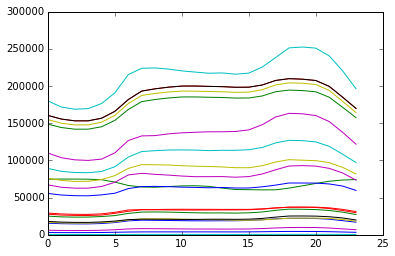

In [4]:
zonemean =load.groupby('zone_id').mean()

zonem = zonemean.iloc[:,3:28]

plt.plot(np.swapaxes(zonem,0,1))

In [5]:
# drop NAN
data = whole.dropna(axis=0,how='any')

# spilt zone

zone = {}
sorttime = {}
tempmean ={}
timeseries ={}
p = {}
ts = {}
df = {}

for z_id in range(1,21):        
    zone[z_id] = data.loc[data['zone_id']== z_id]
    
    # sort by time
    
    sorttime[z_id] = zone[z_id].sort(columns='time')
    
    # give mean temp over 11 stations
    
    tempmean[z_id] =  sorttime[z_id].iloc[:,2:13].mean(1)
    
    timeseries[z_id] = pd.DataFrame({'load':sorttime[z_id]['load'],
                     'temp':tempmean[z_id].values,
                     'time':sorttime[z_id].time})
    
    # plot acf and pacf
    ts[z_id] = pd.DataFrame({'load':sorttime[z_id]['load'],'time':sorttime[z_id]['time']})
    ts[z_id]['time'] = pd.to_datetime(ts[z_id]['time'])
    ts[z_id]['day'] = ts[z_id]['time'].dt.date
    df[z_id] = ts[z_id].groupby('day').mean()
    df[z_id]['log_load'] = np.log(df[z_id]['load']) - np.log(df[z_id]['load'].shift(1))
    df[z_id] = df[z_id].ix[1:]
    
    #p[z_id] = timeseries[z_id].set_index('time')
       
    # build timestamp
    #idx = pd.date_range('2004-01-01', '2008-07-08',freq='H')
   
    #sorttime[z_id]['timestamp'] = idx[1:39415]
    
    
    # transfer into DMatrix format and using weight
    #dtrain[z_id] = xgb.DMatrix(zone_m[z_id])
    
    # specify parameters 
    #param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'reg:linear' }
    
    # specify validation 

In [6]:
timeseries[1]

,load,temp,time
0,16853,42.363636,2004-01-01 01:00:00
33000,16450,41.272727,2004-01-01 02:00:00
66000,16517,39.636364,2004-01-01 03:00:00
99000,16873,36.272727,2004-01-01 04:00:00
132000,17064,34.636364,2004-01-01 05:00:00
165000,17727,34.727273,2004-01-01 06:00:00
198000,18574,32.636364,2004-01-01 07:00:00
231000,19355,31.454545,2004-01-01 08:00:00
264000,19534,32.454545,2004-01-01 09:00:00
297000,18611,38.818182,2004-01-01 10:00:00


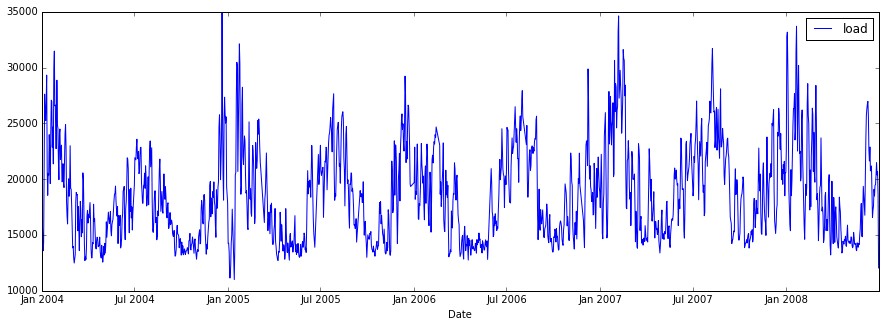

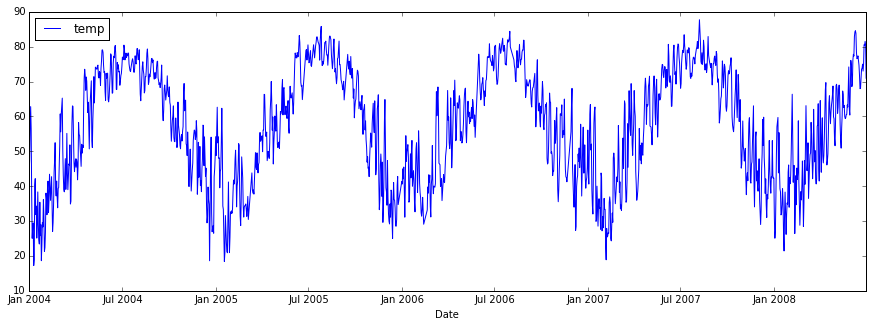

In [7]:
# time series plot for zone 1 

cc1 = timeseries[1]

cc1['time'] = pd.to_datetime(cc1['time'])

cc1['date'] = cc1['time'].dt.date

cc1

cc11 = cc1.groupby('date').mean()

cc11['Date'] = cc11.index

cc11.plot(x='Date',y='load',figsize=(15,5))
cc11.plot(x='Date',y='temp',figsize=(15,5))


In [8]:
df[18]['log_load']

day
2004-01-02   -0.081496
2004-01-03   -0.132790
2004-01-04   -0.118085
2004-01-05    0.135420
2004-01-06    0.312420
2004-01-07    0.227772
2004-01-08    0.004621
2004-01-09   -0.051642
2004-01-10    0.208380
2004-01-11    0.041680
2004-01-12   -0.379674
2004-01-13   -0.066709
2004-01-14    0.123144
2004-01-15   -0.010757
2004-01-16    0.150167
2004-01-17   -0.039328
2004-01-18   -0.159449
2004-01-19    0.133498
2004-01-20    0.079823
2004-01-21    0.049480
2004-01-22   -0.159343
2004-01-23    0.057571
2004-01-24    0.018884
2004-01-25    0.175009
2004-01-26    0.005655
2004-01-27   -0.096013
2004-01-28   -0.082993
2004-01-29   -0.088991
2004-01-30    0.009722
2004-01-31    0.150912
                ...   
2008-06-01   -0.039400
2008-06-02   -0.129386
2008-06-03   -0.009572
2008-06-04    0.125313
2008-06-05    0.143648
2008-06-06    0.013833
2008-06-07    0.144147
2008-06-08    0.044062
2008-06-09    0.015439
2008-06-10   -0.019450
2008-06-11   -0.158507
2008-06-12   -0.013205
2008-06

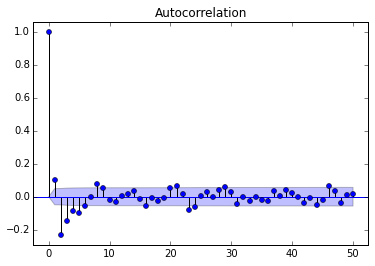

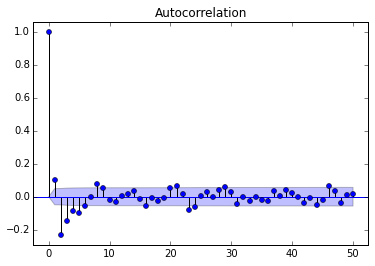

In [9]:
# plot acf and pacf for zone 18

import statsmodels.graphics.tsaplots as s

s.plot_acf(df[18]['log_load'],lags=50)

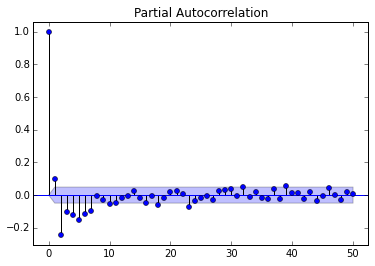

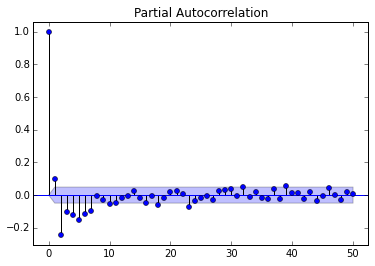

In [10]:
s.plot_pacf(df[18]['log_load'],lags=50)